In [2]:
# Please modigy this path to your specific case, in mine the repository folder is inside /gh folder
PATH_REPO_FOLDER = '/gh/kaggle-pg-4x01'

# Importing libraries

In [3]:
import sys
sys.path.insert(1, PATH_REPO_FOLDER)
import zipfile
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import log_loss
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import pickle
import src.functions as func
import requests
import seaborn as sn
from sklearn.linear_model import SGDClassifier


In [4]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
target = "Exited"

# Getting data

In [6]:
with zipfile.ZipFile("../data/playground-series-s4e1.zip") as z:
    with z.open("sample_submission.csv") as f:
        sample_submission = pd.read_csv(f)
    with z.open("test.csv") as f:
        test = pd.read_csv(f)
    with z.open("train.csv") as f:
        train = pd.read_csv(f)

# Exploring data

In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      110023 non-null  int64  
 1   Exited  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [10]:
test["id"].min()

165034

In [11]:
train.head(3).T

,0,1,2
id,0,1,2
CustomerId,15674932,15749177,15694510
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh
CreditScore,668,627,678
Geography,France,France,France
Gender,Male,Male,Male
Age,33.0,33.0,40.0
Tenure,3,1,10
Balance,0.0,0.0,0.0
NumOfProducts,2,2,2


In [12]:
sample_submission.head(3)

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5


In [13]:
sample_submission["id"].min()

165034

In [14]:
sample_submission[target].mean()

0.5

In [15]:
sample_submission[target].min(), sample_submission[target].max()

(0.5, 0.5)

In [16]:
train[target].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

# Base line model

In [17]:
prediction = func.base_line(train)
prediction

,id,Exited
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
165029,165029,0.5
165030,165030,0.5
165031,165031,0.5
165032,165032,0.5


In [18]:
prediction[target].head(1)

0    0.5
Name: Exited, dtype: float64

In [19]:

error = roc_auc_score(train[target],prediction[target])

In [20]:
error

0.5

In [21]:
prediction = func.base_line(test)

In [22]:
prediction.to_csv("../data/base-line-model-answer.csv",index=False)

In [23]:
# kaggle competitions submit -c playground-series-s3e25 -f submission.csv -m "Message"

# 2nd Model

# Exploring data v2

In [24]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,165034.0,NaN,NaN,NaN,82516.5,47641.3565,0.0,41258.25,82516.5,123774.75,165033.0
CustomerId,165034.0,NaN,NaN,NaN,15692005.019026,71397.816791,15565701.0,15633141.0,15690169.0,15756824.0,15815690.0
Surname,165034,2797,Hsia,2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034.0,NaN,NaN,NaN,656.454373,80.10334,350.0,597.0,659.0,710.0,850.0
Geography,165034,3,France,94215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,Male,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034.0,NaN,NaN,NaN,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Tenure,165034.0,NaN,NaN,NaN,5.020353,2.806159,0.0,3.0,5.0,7.0,10.0
Balance,165034.0,NaN,NaN,NaN,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
NumOfProducts,165034.0,NaN,NaN,NaN,1.554455,0.547154,1.0,1.0,2.0,2.0,4.0


In [25]:
categorical_variables = ["Geography","Gender","Surname","NumOfProducts","IsActiveMember","HasCrCard","Tenure"]

In [26]:
features = list(train.columns)
features.remove (target)
features.remove ("id")
features.remove("CustomerId")

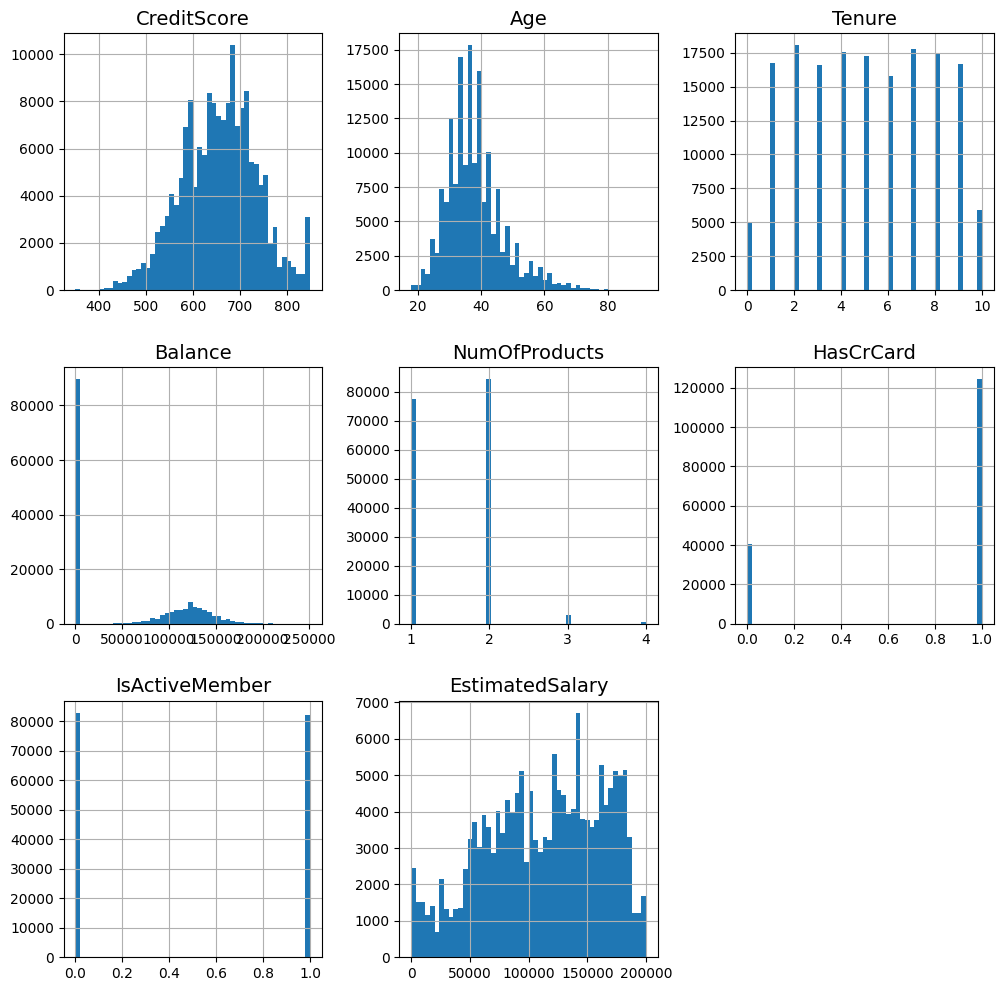

In [27]:
train[features].hist(bins=50, figsize=(12, 12))
plt.show()

In [28]:
train.groupby(["IsActiveMember",target],as_index=False)["id"].count()

,IsActiveMember,Exited,id
0,0.0,0,58261
1,0.0,1,24624
2,1.0,0,71852
3,1.0,1,10297


In [29]:
24624/(58261+24624) , 1/(1+71852/10297), (1+71852/10297)/(1+58261/24624)

(0.2970863244254087, 0.1253454089520262, 2.3701412513569875)

1. If the client is not an active member they're 2.37 times more likely to close their account

<Axes: xlabel='Age', ylabel='Exited'>

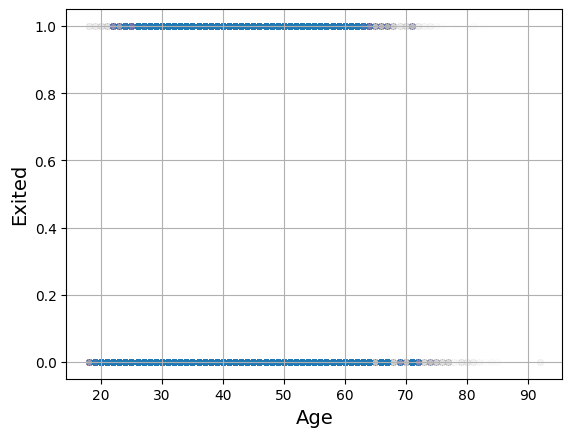

In [30]:
train.plot(kind="scatter", x="Age", y=target,
             alpha=0.005, grid=True)

<Axes: xlabel='Age', ylabel='Count'>

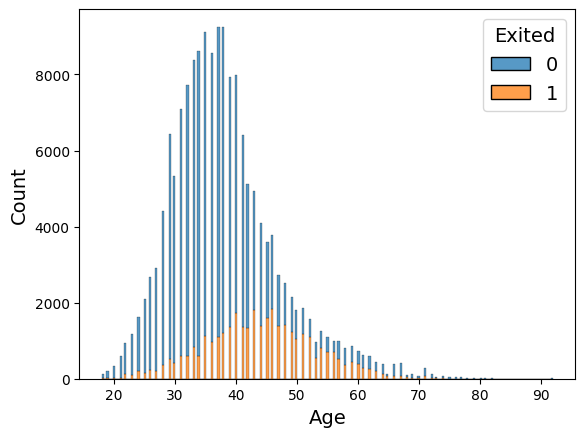

In [31]:
sns.histplot(
    train,
    x="Age", hue=target,
    multiple="stack",
    #palette="light:m_r",
    #edgecolor=".3",
    #linewidth=.5,
    #log_scale=True,
)

2. The Age is a good input variable because the probability of closing my account increases as age increases.

Let's see if the combination Age plus IsActiveMember are good features as predictors

<Axes: xlabel='Age', ylabel='Count'>

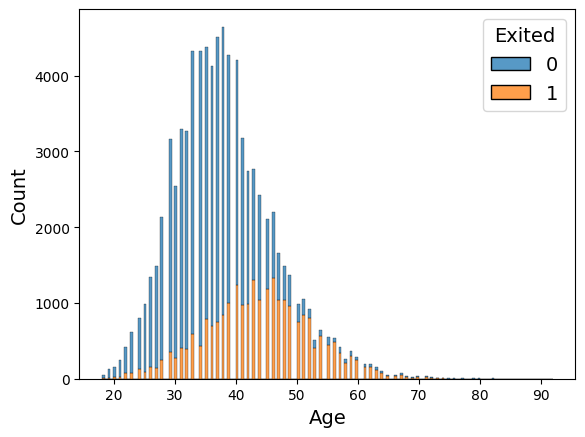

In [32]:
sns.histplot(
    train[train["IsActiveMember"]==0.0],
    x="Age", hue=target,
    multiple="stack",
    #palette="light:m_r",
    #edgecolor=".3",
    #linewidth=.5,
    #log_scale=True,
)

<Axes: xlabel='Age', ylabel='Count'>

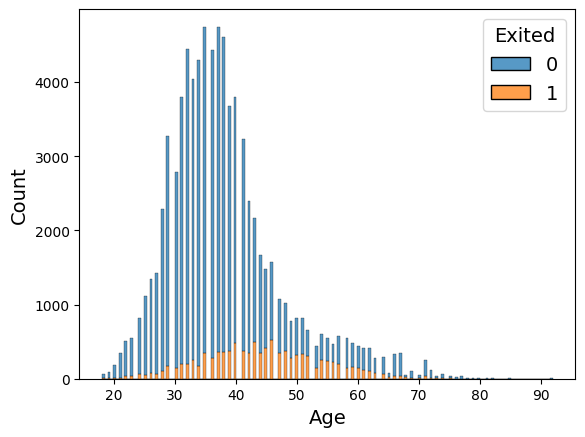

In [33]:
sns.histplot(
    train[train["IsActiveMember"]==1.0],
    x="Age", hue=target,
    multiple="stack",
    #palette="light:m_r",
    #edgecolor=".3",
    #linewidth=.5,
    #log_scale=True,
)

3. The features combination is a good option, the probability distribution is different for each value to IsActiveMember column

# splitting the data

In [34]:
strat_train_set, strat_test_set = train_test_split(
    train, test_size=0.2, stratify=train[[target,"IsActiveMember"]], random_state=42)

In [35]:
strat_train_set.shape, strat_test_set.shape, strat_train_set.groupby([target,"IsActiveMember"],as_index=False)["Age"].count(),strat_test_set.groupby([target,"IsActiveMember"],as_index=False)["Age"].count()

((132027, 14),
 (33007, 14),
    Exited  IsActiveMember    Age
 0       0             0.0  46609
 1       0             1.0  57481
 2       1             0.0  19699
 3       1             1.0   8238,
    Exited  IsActiveMember    Age
 0       0             0.0  11652
 1       0             1.0  14371
 2       1             0.0   4925
 3       1             1.0   2059)

<Axes: xlabel='Age', ylabel='Count'>

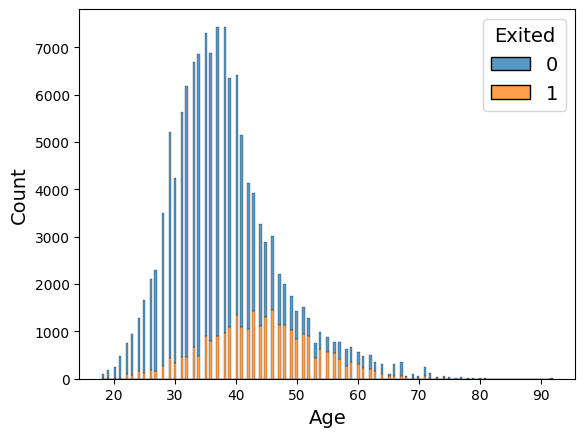

In [36]:
sns.histplot(
    strat_train_set,
    x="Age", hue=target,
    multiple="stack",
    #palette="light:m_r",
    #edgecolor=".3",
    #linewidth=.5,
    #log_scale=True,
)

In [37]:
strat_train_set["Age"].describe(),strat_train_set["Age"].describe()[-1]

/tmp/ipykernel_4738/4269011632.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strat_train_set["Age"].describe(),strat_train_set["Age"].describe()[-1]


(count    132027.000000
 mean         38.138250
 std           8.862416
 min          18.000000
 25%          32.000000
 50%          37.000000
 75%          42.000000
 max          92.000000
 Name: Age, dtype: float64,
 92.0)

<Axes: ylabel='Age'>

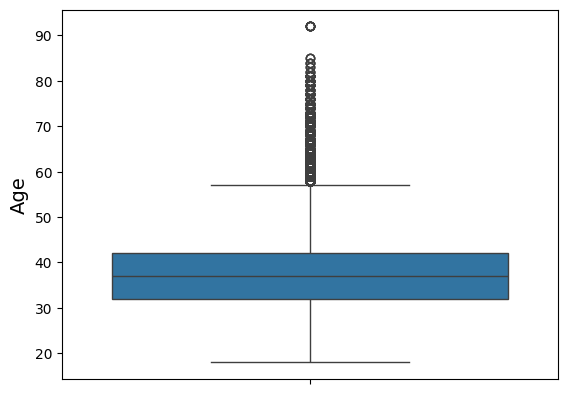

In [38]:
sns.boxplot(y=strat_train_set["Age"])

In [39]:
describing_age = pd.DataFrame(strat_train_set["Age"].describe())

In [40]:
describing_age

,Age
count,132027.000000
mean,38.138250
std,8.862416
min,18.000000
25%,32.000000
50%,37.000000
75%,42.000000
max,92.000000


In [41]:
iqr = describing_age.loc["75%"].values[0]-describing_age.loc["25%"].values[0]

In [42]:
min_outlier = describing_age.loc["25%"].values[0]-1.5*iqr
max_outlier = describing_age.loc["75%"].values[0]+1.5*iqr

In [43]:
min_outlier, max_outlier

(17.0, 57.0)

In [44]:
strat_train_set.shape, strat_train_set[strat_train_set["Age"]>max_outlier].shape

((132027, 14), (5105, 14))

In [45]:
5105/132027

0.03866633340150121

4. 3.8% of the training data is considered as outlier

In [46]:
strat_train_set = strat_train_set[strat_train_set["Age"]<=max_outlier].copy()

In [47]:
strat_train_set["Age"].values

array([37., 34., 39., ..., 32., 32., 40.])

In [48]:
std_scaler = StandardScaler()
strat_train_set["Age_scaled"] = std_scaler.fit_transform(strat_train_set[["Age"]])

In [49]:
selected_features = ["IsActiveMember","Age_scaled"]

In [50]:
std_scaler.mean_, std_scaler.var_

(array([37.1267454]), array([54.24540351]))

# training

In [91]:
X = strat_train_set[selected_features].values
y = strat_train_set[target].values

In [52]:
X, y

(array([[ 0.        , -0.01720881],
        [ 1.        , -0.4245326 ],
        [ 0.        ,  0.25434039],
        ...,
        [ 1.        , -0.6960818 ],
        [ 1.        , -0.6960818 ],
        [ 1.        ,  0.39011499]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [53]:
clf = SGDClassifier(loss="log_loss", max_iter=5,random_state=42)
clf.fit(X, y)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

# Evaluating 2nd model

In [54]:
y_hat = clf.predict_proba(X)

In [55]:
y_hat.shape

(126922, 2)

In [56]:
y_hat

array([[0.74976438, 0.25023562],
       [0.93660089, 0.06339911],
       [0.69154119, 0.30845881],
       ...,
       [0.95179234, 0.04820766],
       [0.95179234, 0.04820766],
       [0.86089488, 0.13910512]])

In [57]:
X

array([[ 0.        , -0.01720881],
       [ 1.        , -0.4245326 ],
       [ 0.        ,  0.25434039],
       ...,
       [ 1.        , -0.6960818 ],
       [ 1.        , -0.6960818 ],
       [ 1.        ,  0.39011499]])

In [58]:
y_hat[:,1], y_hat[:,1].max()

(array([0.25023562, 0.06339911, 0.30845881, ..., 0.04820766, 0.04820766,
        0.13910512]),
 0.8584967354565334)

In [89]:
list_val = list(y_hat[:,1])
list_val.index(0.8584967354565334)

7

In [92]:
X.shape

(126922, 2)

In [93]:
X[7]

array([0.        , 2.69828317])

In [94]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
clf.classes_

array([0, 1])

In [96]:
error = roc_auc_score(strat_train_set[target],y_hat[:,1])
error

0.7822198140484762

In [97]:
strat_test_set["Age_scaled"] = std_scaler.transform(strat_test_set[["Age"]])

In [98]:
X_test = strat_test_set[selected_features].values
y_test = strat_test_set[target].values

In [99]:

y_hat_test = clf.predict_proba(X_test)

In [100]:
error = roc_auc_score(strat_test_set[target],y_hat_test[:,1])
error

0.7788321280377624

In [101]:
clf2 = SGDClassifier(loss="log_loss", max_iter=5,random_state=42)

In [102]:
scores = -cross_val_score(clf2, strat_train_set[selected_features], strat_train_set[target],
                              scoring="roc_auc", cv=10)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic

In [103]:
scores, scores.mean()

(array([-0.78734768, -0.78134842, -0.78349072, -0.79107058, -0.78684465,
        -0.77163073, -0.77420439, -0.7817405 , -0.77954453, -0.78396089]),
 -0.7821183088498798)

# prediction 2nd model

In [104]:
test["Age_scaled"] = std_scaler.transform(test[["Age"]])
X_test_final = test[selected_features].values
y_hat_test_final = clf.predict_proba(X_test_final)
test["Exited"] = y_hat_test_final[:,1]

In [105]:
cols = ["id"]+["Exited"]
test[cols].to_csv("../data/2nd-model-answer.csv",index=False)

# preparing deployment

In [106]:
dicts = strat_train_set[selected_features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

In [107]:
X_train.shape

(126922, 2)

In [108]:
output_file = '../models/sgd-classifier.bin'
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, clf), f_out)

In [109]:
with open(output_file, 'rb') as f_in: 
    dv2, model = pickle.load(f_in)

In [110]:
customer = {
    "IsActiveMember":0.0,
    "Age_scaled":0.0
}

In [111]:
X = dv2.transform([customer])

In [112]:
X

array([[0., 0.]])

In [113]:
y_pred = model.predict_proba(X)

In [114]:
print('input:', customer)
print('output:', y_pred)

input: {'IsActiveMember': 0.0, 'Age_scaled': 0.0}
output: [[0.74630026 0.25369974]]


In [115]:
customer = {
    "IsActiveMember":0.0,
    "Age_scaled":0.0
}

url = 'http://localhost:9695/predict'

response = requests.post(url, json=customer).json()
print(response)

{'churn_probability': 0.2536997407632851}


In [116]:
customer = {
    "IsActiveMember":0.0,
    "Age_scaled":0.4
}

url = 'http://localhost:9695/predict'

response = requests.post(url, json=customer).json()
print(response)

{'churn_probability': 0.342591648713607}


In [119]:
customer = {
    "IsActiveMember":0.0,
    "Age_scaled":2.69
}

url = 'http://localhost:9695/predict'

response = requests.post(url, json=customer).json()
print(response)

{'churn_probability': 0.8574186327115129}


In [120]:
selected_features

['IsActiveMember', 'Age_scaled']